# Exercise for PhD students and interested Master students



## Task (A): Simulating Returns from a Stochastic Volatility Model

A.1 Set the seed to 123.

A.2 Consider n=1000 time points. 

A.3 Parametrize the SVM as follows: sigma_bar = 0.35, phi=0.999, sigma2_eta = 0.2, sigma2_h0 = sigma2_eta / (1-phi^2), rho_r_h = -0.3

A.4 Notice, returns are mean zero with this specification. Generate n=1000 draws of innovations for $r_t$ and $h_t$ according the SVM probability density function.

A.5 Plot both innovation time series into a graph. Use blue for return innovations and orange for volatility innovations.

A.6 Set h_0 = 0. Then, simulate n=1000 time points for h_t. 

A.7 Compute the time series for sigma_t.

A.8 Plot the time series of this one path of realized volatility. 

A.9 Plot a histogram of realized return volatility.

A.10 Visualize the time series of realized returns. 

A.11 Show a histogram for the realized returns.

In [1]:
#packages
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#set seed
np.random.seed(123) #change the seed and you change the path

In [3]:
#nr of time points
n=1000

In [4]:
#assign values to SVM parameters
sigma_bar = 0.35
phi = 0.999
sigma2_eta = 0.2
sigma2_h0 = sigma2_eta/(1-(phi**2))

In [5]:
#MVN(.) to account for leverage effect (high vol, low returns)
rho_r_h = -0.3 #leverage effect
mean_shocks = (0,0)
cov_shocks  = [[1, rho_r_h*np.sqrt(sigma2_eta)*1], [rho_r_h*np.sqrt(sigma2_eta)*1, sigma2_eta, ]]

#get xi_t and h_t, accounting for correlation
return_shocks, vol_shocks = np.random.multivariate_normal(mean_shocks, cov_shocks,n).T

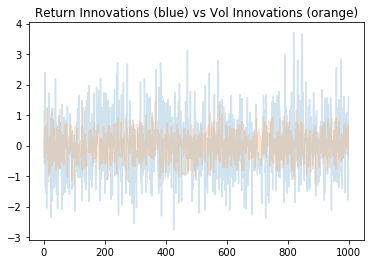

In [6]:
#plot return and vol shocks
plt.plot(range(1,n+1), return_shocks, alpha=0.2)
plt.plot(range(1,n+1), vol_shocks, alpha=0.2)
plt.title('Return Innovations (blue) vs Vol Innovations (orange)')
plt.show()

In [7]:
#for the simulation, h_0 is set to its unconditional mean, i.e. h_0 = 0
h0 = 0

In [8]:
#initialize h_t, i.e. state variable that drives conditional return variance
ht = np.zeros(n)
ht[0] = h0 #initialization

In [9]:
#iterate state equation for h_t
for t in range(1,n):
    ht[t] = phi*ht[t-1] + vol_shocks[t-1]

In [10]:
#SVM implied time-series of return vol
sigma_t  = sigma_bar * np.exp(0.5*ht)

Text(0.5, 1.0, 'Realized Return Volatility')

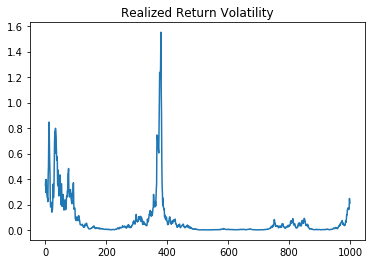

In [11]:
#visualize time series of realized return vol
plt.plot(sigma_t)
plt.title('Realized Return Volatility')

Text(0.5, 1.0, 'Distribution of realized Return Vol')

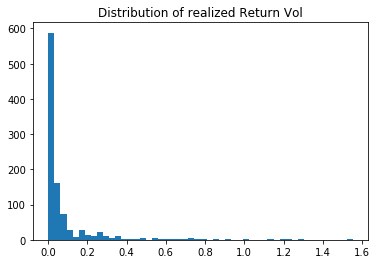

In [12]:
#histogram realized return vol
plt.hist(sigma_t,bins=50);
plt.title('Distribution of realized Return Vol')

In [13]:
#SVM implied demeand returns, account for correlation
r_t = sigma_t * return_shocks

Text(0.5, 1.0, 'Realized Returns')

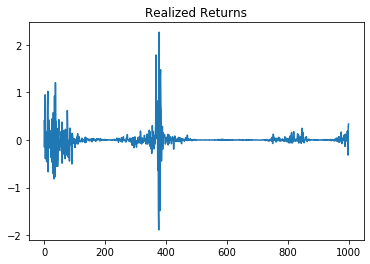

In [14]:
#visualize time series of realized returns
plt.plot(r_t)
plt.title('Realized Returns')

Text(0.5, 1.0, 'Distribution of realized Return')

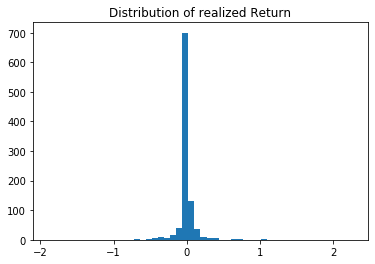

In [15]:
#histogram realized return  
plt.hist(r_t,bins=50);
plt.title('Distribution of realized Return')